### Kalman Filters

Kalman Filter is an algorithm that uses noisy sensor measurements (and Bayes' Rule) to produce reliable estimates of unknown quantities (like where a vehicle is likely to be in 3 seconds). Kalman Filters gives us a mathematical way to esitmate the position of the object based on set of previous measured location and other parameters.

**kalman Filter** https://en.wikipedia.org/wiki/Kalman_filter

**Note** Tracking an object can be done by Monte Carlo or Kalman Filter. MC uses Discrete Distribution and its Multi-Modal, while KF is continous and Uni-Modal.


The general Gaussian equation:
 $p(x) = \frac{1}{{ \sqrt {2\pi \sigma ^2 } }}e^{{ - ( {x - \mu } )^2 }/{2\sigma ^2 }}$
 
The first part of the equation is the coefficient and the second part the exponential. This second part is most important in defining the shape of the Gaussian (the coefficient is a normalizing term). For uncertain, continuous quantities, such as the estimated location of a self-driving car, we use Gaussians to represent uncertainty in that quantity. The smaller the variance, the more certain we are about a quantity.

In Kalman Filter, we estimate the new location based on the mean and variance of the gaussian distribution, which in turn is a continous function. If mean and variance is applied on Car location problem, the we would require a variance of small value to be more accurate regarding the car location.

    Smaller variance = more certain measurement.
    
**Variance** is also a measure of certainty; if you are trying to find something like the location of a car with the most certainty, you'll want a Gaussian whose mean is the location of the car and with the smallest uncertainty/spread.

**Shifting mean**, it refers to when a measurement update is received for a vehicle, then that measurement has distribution which is similar to gaussian, with its mean and variance. If the variance of updated measurement is small then the new mean will shifted towards new gaussian measurement.

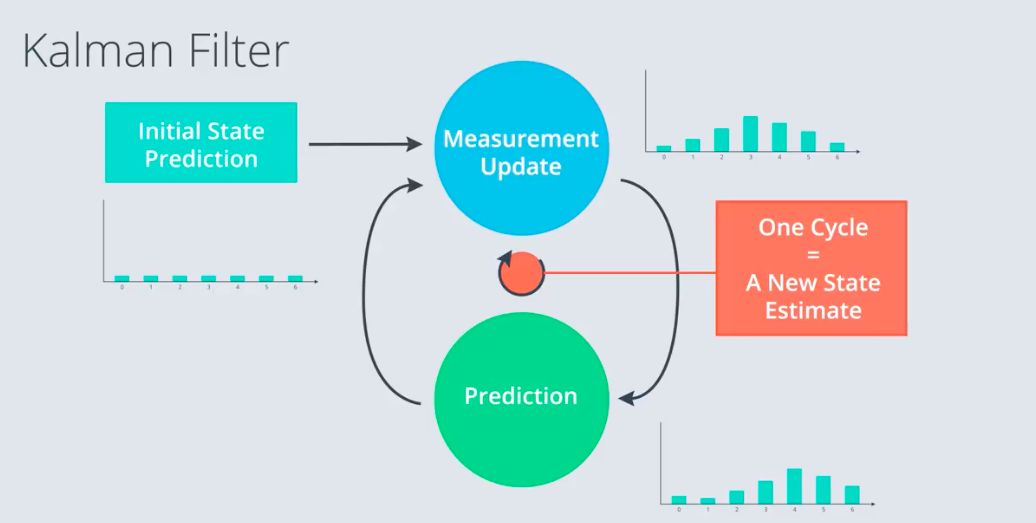

In [19]:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/cv_images/kalman_filter.png")

In [5]:
# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np

# gaussian function
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential

In [6]:
# an example Gaussian
gauss_1 = f(10, 4, 8)
print(gauss_1)

0.12098536225957168


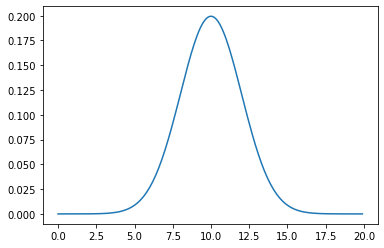

In [7]:
# display a gaussian over a range of x values
# define the parameters
mu = 10
sigma2 = 4

# define a range of x values
x_axis = np.arange(0, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

In [8]:
# maximize a Gaussian by setting mu and x equal
gauss_2 = f(10, 4, 10)
print(gauss_2)

0.19947114020071635


### New Mean and Variance - Measurement Update

Now let's take the formulas from the example below and use them to write a program that takes in two means and variances, and returns a new, updated mean and variance for a gaussian. This step is called the **parameter or measurement update** because it is the update that happens when an initial belief (represented by the blue Gaussian, below) is merged with a new piece of information, a measurement with some uncertainty (the orange Gaussian).

The updated Gaussian will be a combination of these two Gaussians with a new mean that is in between both of theirs and a variance that is less than the smallest of the two given variances; this means that after a measurement, our new mean is more certain than that of the initial belief!

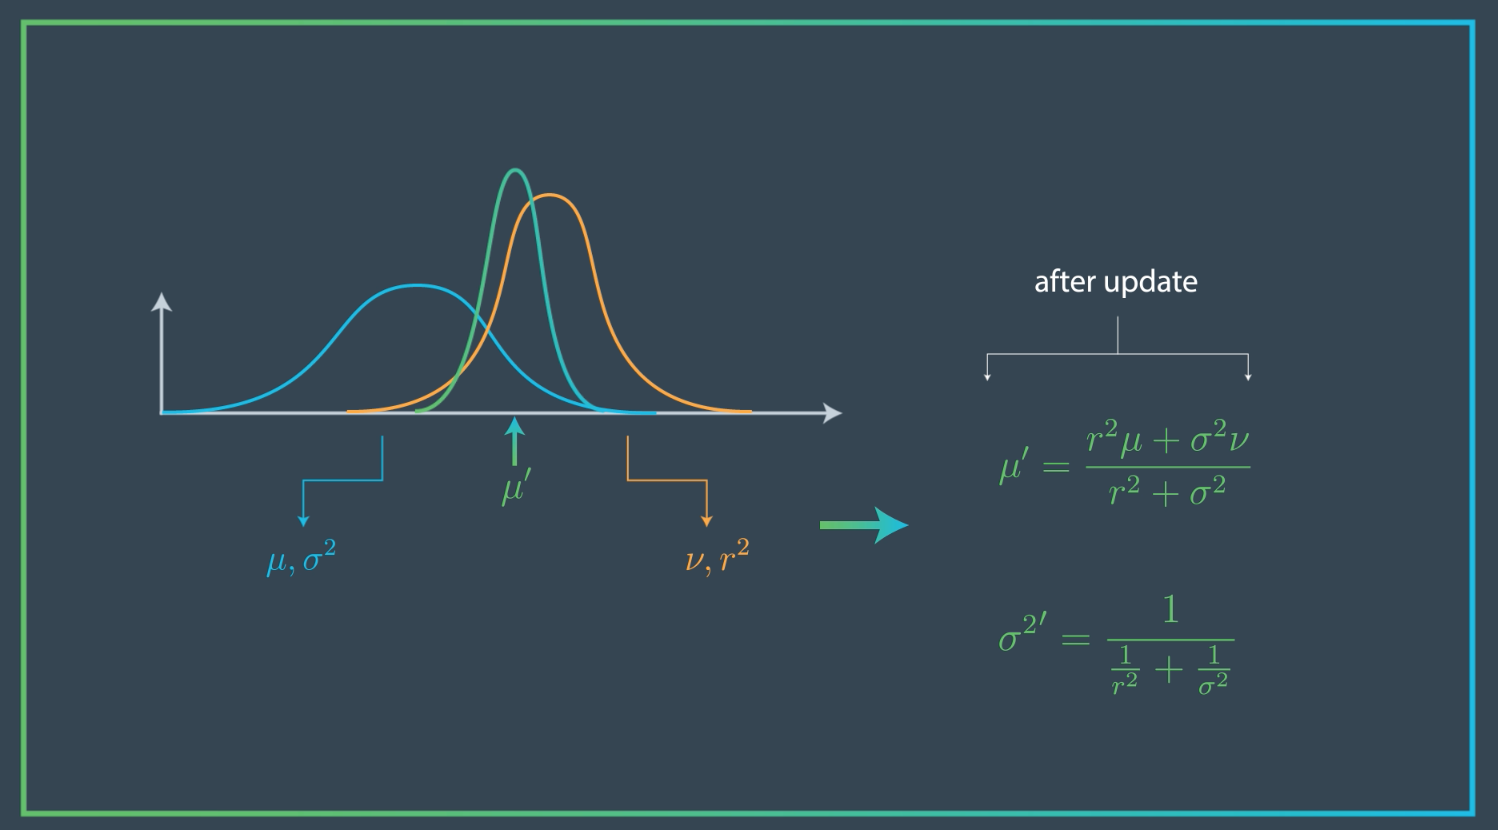

In [9]:
Image("/Users/mayurjain/Desktop/cv_images/mean_var.png")

In [10]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    ## TODO: Calculate the new parameters
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]

In [11]:
# test your implementation
new_params = update(10, 4, 12, 4)
print(new_params)

[11.0, 2.0]


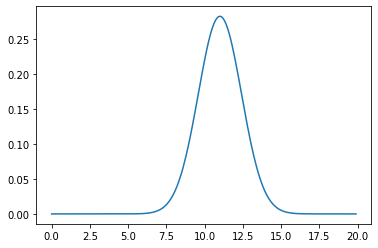

In [12]:
# display a gaussian over a range of x values
# define the parameters
mu = new_params[0]
sigma2 = new_params[1]

# define a range of x values
x_axis = np.arange(0, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

### Motion Update

A motion update is just an addition between parameters; the new mean will be the old mean + the motion mean; same with the new variance!

In [13]:
# the motion update/predict function
def predict(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    ## TODO: Calculate the new parameters
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [14]:
# test your implementation
new_params = predict(10, 4, 12, 4)
print(new_params)

[22, 8]


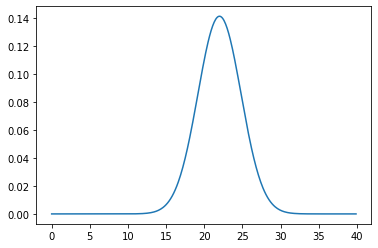

In [15]:
# display a gaussian over a range of x values
# define the parameters
mu = new_params[0]
sigma2 = new_params[1]

# define a range of x values
x_axis = np.arange(0, 40, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

### 1D Kalman Filter
Let's take the case of a robot that moves through the world. As a robot moves through the world it locates itself by performing a cycle of:
    
    sensing and performing a measurement update and
    moving and performing a motion update

After implementing this filter, we should see that we can go from a very uncertain location Gaussian to a more and more certain Gaussian, as pictured below. The code in this notebooks is really just a simplified version of the Kalman filter that runs in the Google self-driving car that is used to track surrounding vehicles and other objects.


In [16]:
# measurements for mu and motions, U
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.


## TODO: Loop through all measurements/motions
# this code assumes measurements and motions have the same length
# so their updates can be performed in pairs
for n in range(len(measurements)):
    # measurement update, with uncertainty
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    print('Update: [{}, {}]'.format(mu, sig))
    # motion update, with uncertainty
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    print('Predict: [{}, {}]'.format(mu, sig))

    
# print the final, resultant mu, sig
print('\n')
print('Final result: [{}, {}]'.format(mu, sig))


Update: [4.998000799680128, 3.9984006397441023]
Predict: [5.998000799680128, 5.998400639744102]
Update: [5.999200191953932, 2.399744061425258]
Predict: [6.999200191953932, 4.399744061425258]
Update: [6.999619127420922, 2.0951800575117594]
Predict: [8.999619127420921, 4.09518005751176]
Update: [8.999811802788143, 2.0235152416216957]
Predict: [9.999811802788143, 4.023515241621696]
Update: [9.999906177177365, 2.0058615808441944]
Predict: [10.999906177177365, 4.005861580844194]


Final result: [10.999906177177365, 4.005861580844194]


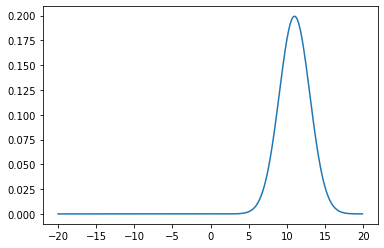

In [17]:
## Print out and display the final, resulting Gaussian 
# set the parameters equal to the output of the Kalman filter result
mu = mu
sigma2 = sig

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

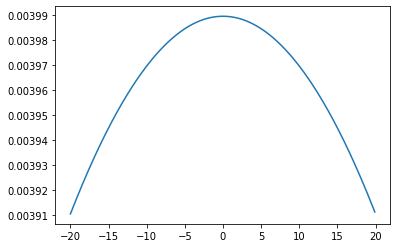

In [18]:
# display the *initial* gaussian over a range of x values
# define the parameters
mu = 0
sigma2 = 10000

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

**The beauty of Kalman filters is that they combine somewhat inaccurate sensor measurements with somewhat inaccurate predictions of motion to get a filtered location estimate that is better than any estimates that come from only sensor readings or only knowledge about movement.**